###### Name - Shivam

# Task 2 - Exploratory Data Analysis


    • The background information for this task:

    The BCG project team thinks that building a churn model to understand whether price sensitivity is the largest driver of churn has potential. The client has sent over some data and the AD wants you to perform some exploratory data analysis.

    • The data that was sent over includes:

       - Historical customer data: Customer data such as usage, sign up date, forecasted usage etc
       - Historical pricing data: variable and fixed pricing data etc
       - Churn indicator: whether each customer has churned or not
        
#### Task 1:

    •  Perform some exploratory data analysis. Look into the data types, data statistics, specific parameters, and variable distributions. This first subtask is for you to gain a holistic understanding of the dataset.
    
#### Task 2:

    • Verify the hypothesis of price sensitivity being to some extent correlated with churn. It is up to you to define price sensitivity and calculate it.

## 1. Importing Necessary Libraries

In [1]:
import pandas as pd 
import numpy as np

#libraries for data visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Set plot style
sns.set(color_codes=True)

import warnings
warnings.filterwarnings('ignore')

## 2. Importing Dataset

In [2]:
client_data = pd.read_csv('client_data.csv')
client_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


♦ Before modeling later on, we will need to transform the client data, which includes a combination of numeric and categorical variables.

In [3]:
price_data = pd.read_csv('price_data.csv')
price_data.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


♦ With the price data, it is purely numeric data but we can see a lot of zeros.

## 3. Statistics discription of data

### Data types

In [4]:
print("Rows and Columns of Client Data :- ", client_data.shape)
print("Rows and Columns of Price Data :- ", price_data.shape)

Rows and Columns of Client Data :-  (14606, 26)
Rows and Columns of Price Data :-  (193002, 8)


In [5]:
#info of the client data 
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [6]:
#info of the price data 
price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


♦ as you can observe `datetime` related columns are not currently in datetime format. We will need to convert these later.

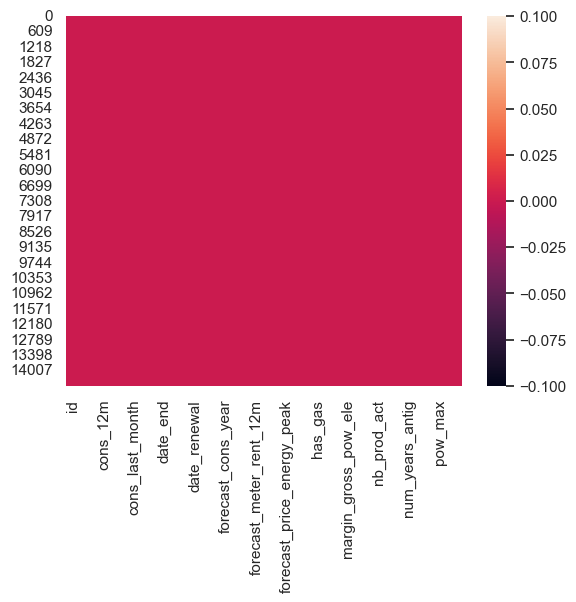

In [8]:
#checking for missing values client data 
sns.heatmap(client_data.isnull())
plt.show()


In [9]:
client_data.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

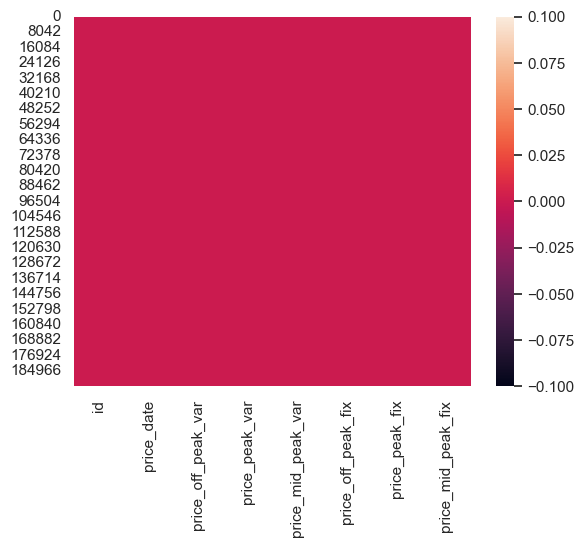

In [10]:
# checking for null values in price_data
sns.heatmap(price_data.isnull())
plt.show()

In [11]:
price_data.isnull().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

                     ♦ no missinng value can be observed.

#### Statistical summary 
summary of `client_data and price_data`

In [12]:
client_data.describe().T

,count,mean,std,min,25%,50%,75%,max
cons_12m,14606.0,159220.286252,573465.264198,0.0,5674.750000,14115.500000,40763.750000,6.207104e+06
cons_gas_12m,14606.0,28092.375325,162973.059057,0.0,0.000000,0.000000,0.000000,4.154590e+06
cons_last_month,14606.0,16090.269752,64364.196422,0.0,0.000000,792.500000,3383.000000,7.712030e+05
forecast_cons_12m,14606.0,1868.614880,2387.571531,0.0,494.995000,1112.875000,2401.790000,8.290283e+04
forecast_cons_year,14606.0,1399.762906,3247.786255,0.0,0.000000,314.000000,1745.750000,1.753750e+05
forecast_discount_energy,14606.0,0.966726,5.108289,0.0,0.000000,0.000000,0.000000,3.000000e+01
forecast_meter_rent_12m,14606.0,63.086871,66.165783,0.0,16.180000,18.795000,131.030000,5.993100e+02
forecast_price_energy_off_peak,14606.0,0.137283,0.024623,0.0,0.116340,0.143166,0.146348,2.739630e-01
forecast_price_energy_peak,14606.0,0.050491,0.049037,0.0,0.000000,0.084138,0.098837,1.959750e-01
forecast_price_pow_off_peak,14606.0,43.130056,4.485988,0.0,40.606701,44.311378,44.311378,5.926638e+01


        - the data is highly skewed as exhibited by pencentile 

In [13]:
price_data.describe().T

,count,mean,std,min,25%,50%,75%,max
price_off_peak_var,193002.0,0.141027,0.025032,0.0,0.125976,0.146033,0.151635,0.280700
price_peak_var,193002.0,0.054630,0.049924,0.0,0.000000,0.085483,0.101673,0.229788
price_mid_peak_var,193002.0,0.030496,0.036298,0.0,0.000000,0.000000,0.072558,0.114102
price_off_peak_fix,193002.0,43.334477,5.410297,0.0,40.728885,44.266930,44.444710,59.444710
price_peak_fix,193002.0,10.622875,12.841895,0.0,0.000000,0.000000,24.339581,36.490692
price_mid_peak_fix,193002.0,6.409984,7.773592,0.0,0.000000,0.000000,16.226389,17.458221


         - the price data looks more in order.

### 4. Data visualization

Deep dive into dataframes

In [14]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )


### Churn

In [16]:
churn = client_data[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100

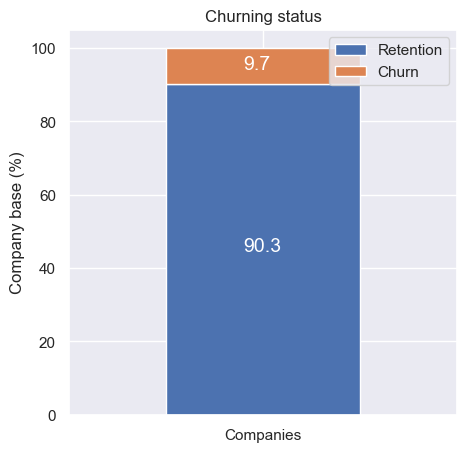


 -------- Value Counts -----

0    13187
1     1419
Name: churn, dtype: int64


In [17]:
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_=1)

print("\n -------- Value Counts -----\n")
print(client_data['churn'].value_counts())

     - nearly 10%(9.7%) of the customers churned and 90% of the customers stayed.

### Analysing sales channels

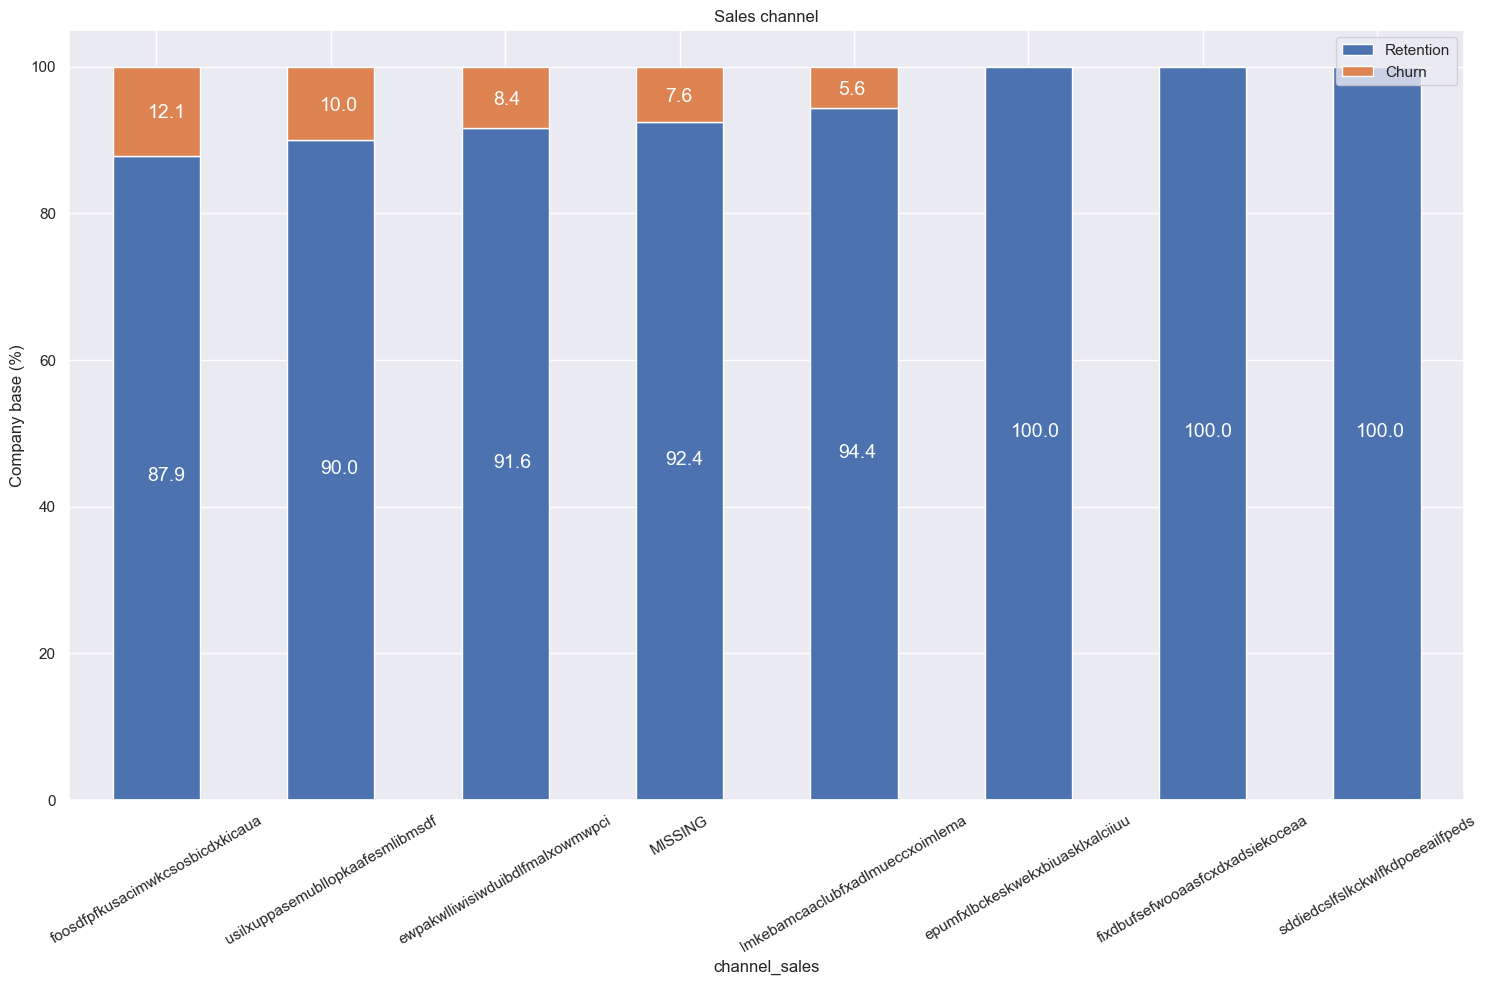

In [20]:
channel = client_data[['id', 'channel_sales', 'churn']]
channel = channel.groupby([channel['channel_sales'], channel['churn']])['id'].count().unstack(level=1).fillna(0)
channel_churn = (channel.div(channel.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)
plot_stacked_bars(channel_churn, 'Sales channel', rot_=30)

- It is noteworthy that the customers who have churned are spread across five distinct values for the 'channel_sales' feature. Additionally, there is a value labeled as MISSING, which indicates a missing value and was added during the dataset cleaning process. Interestingly, the MISSING category exhibits a churn rate of 7.6%. This observation suggests that the MISSING category could be a significant feature to consider when constructing our model.
   

### Analysing of consumption

Observing the distribution of consumption in the last year and month. Using histogram to visualize data consumption data as it is univariant.

In [21]:
consumption = client_data[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]
consumption.head()

,id,cons_12m,cons_gas_12m,cons_last_month,imp_cons,has_gas,churn
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,t,1
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,0.00,f,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,0.00,f,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,0.00,f,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,52.32,f,0


In [22]:
def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

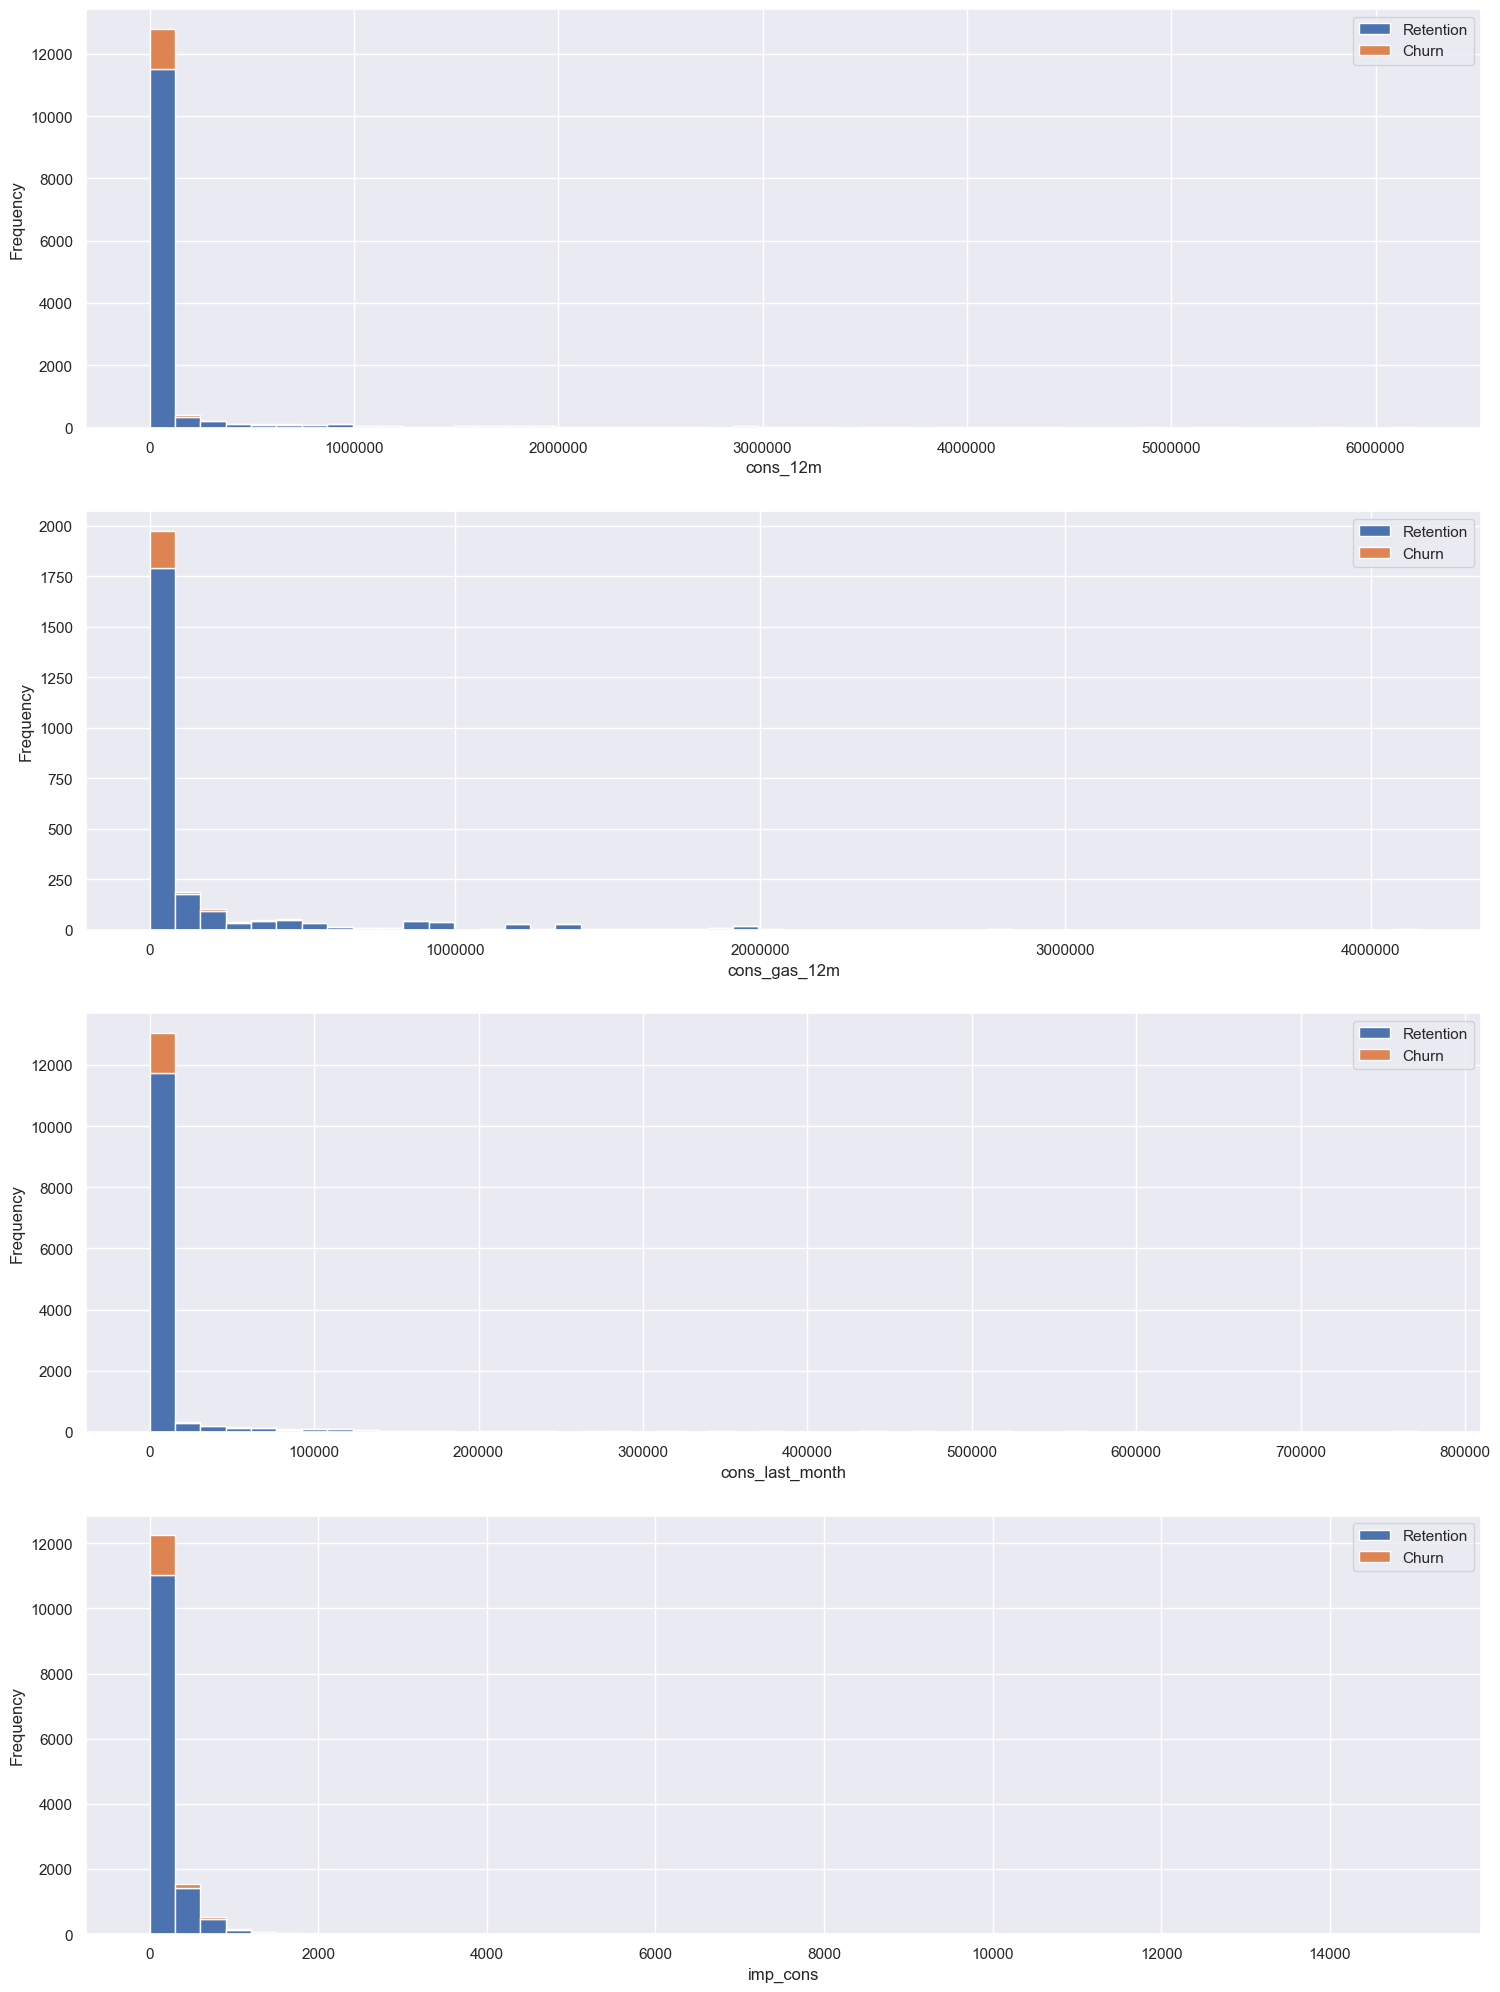

In [23]:
fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

plot_distribution(consumption, 'cons_12m', axs[0])
plot_distribution(consumption[consumption['has_gas'] == 't'], 'cons_gas_12m', axs[1])
plot_distribution(consumption, 'cons_last_month', axs[2])
plot_distribution(consumption, 'imp_cons', axs[3])

- The consumption data exhibits a clear positive skewness, indicating a significant concentration of values towards the lower end of the distribution. Furthermore, there is a pronounced long tail towards the higher values. The presence of outliers is expected to be more prevalent in the extreme upper and lower values of the distribution. To enhance the visibility of these outliers, a commonly used plot can be employed. A boxplot is a popular visual representation that utilizes a five-number summary as the foundation to showcase the distribution characteristics such as minimum, first quartile, median, third quartile, maximum

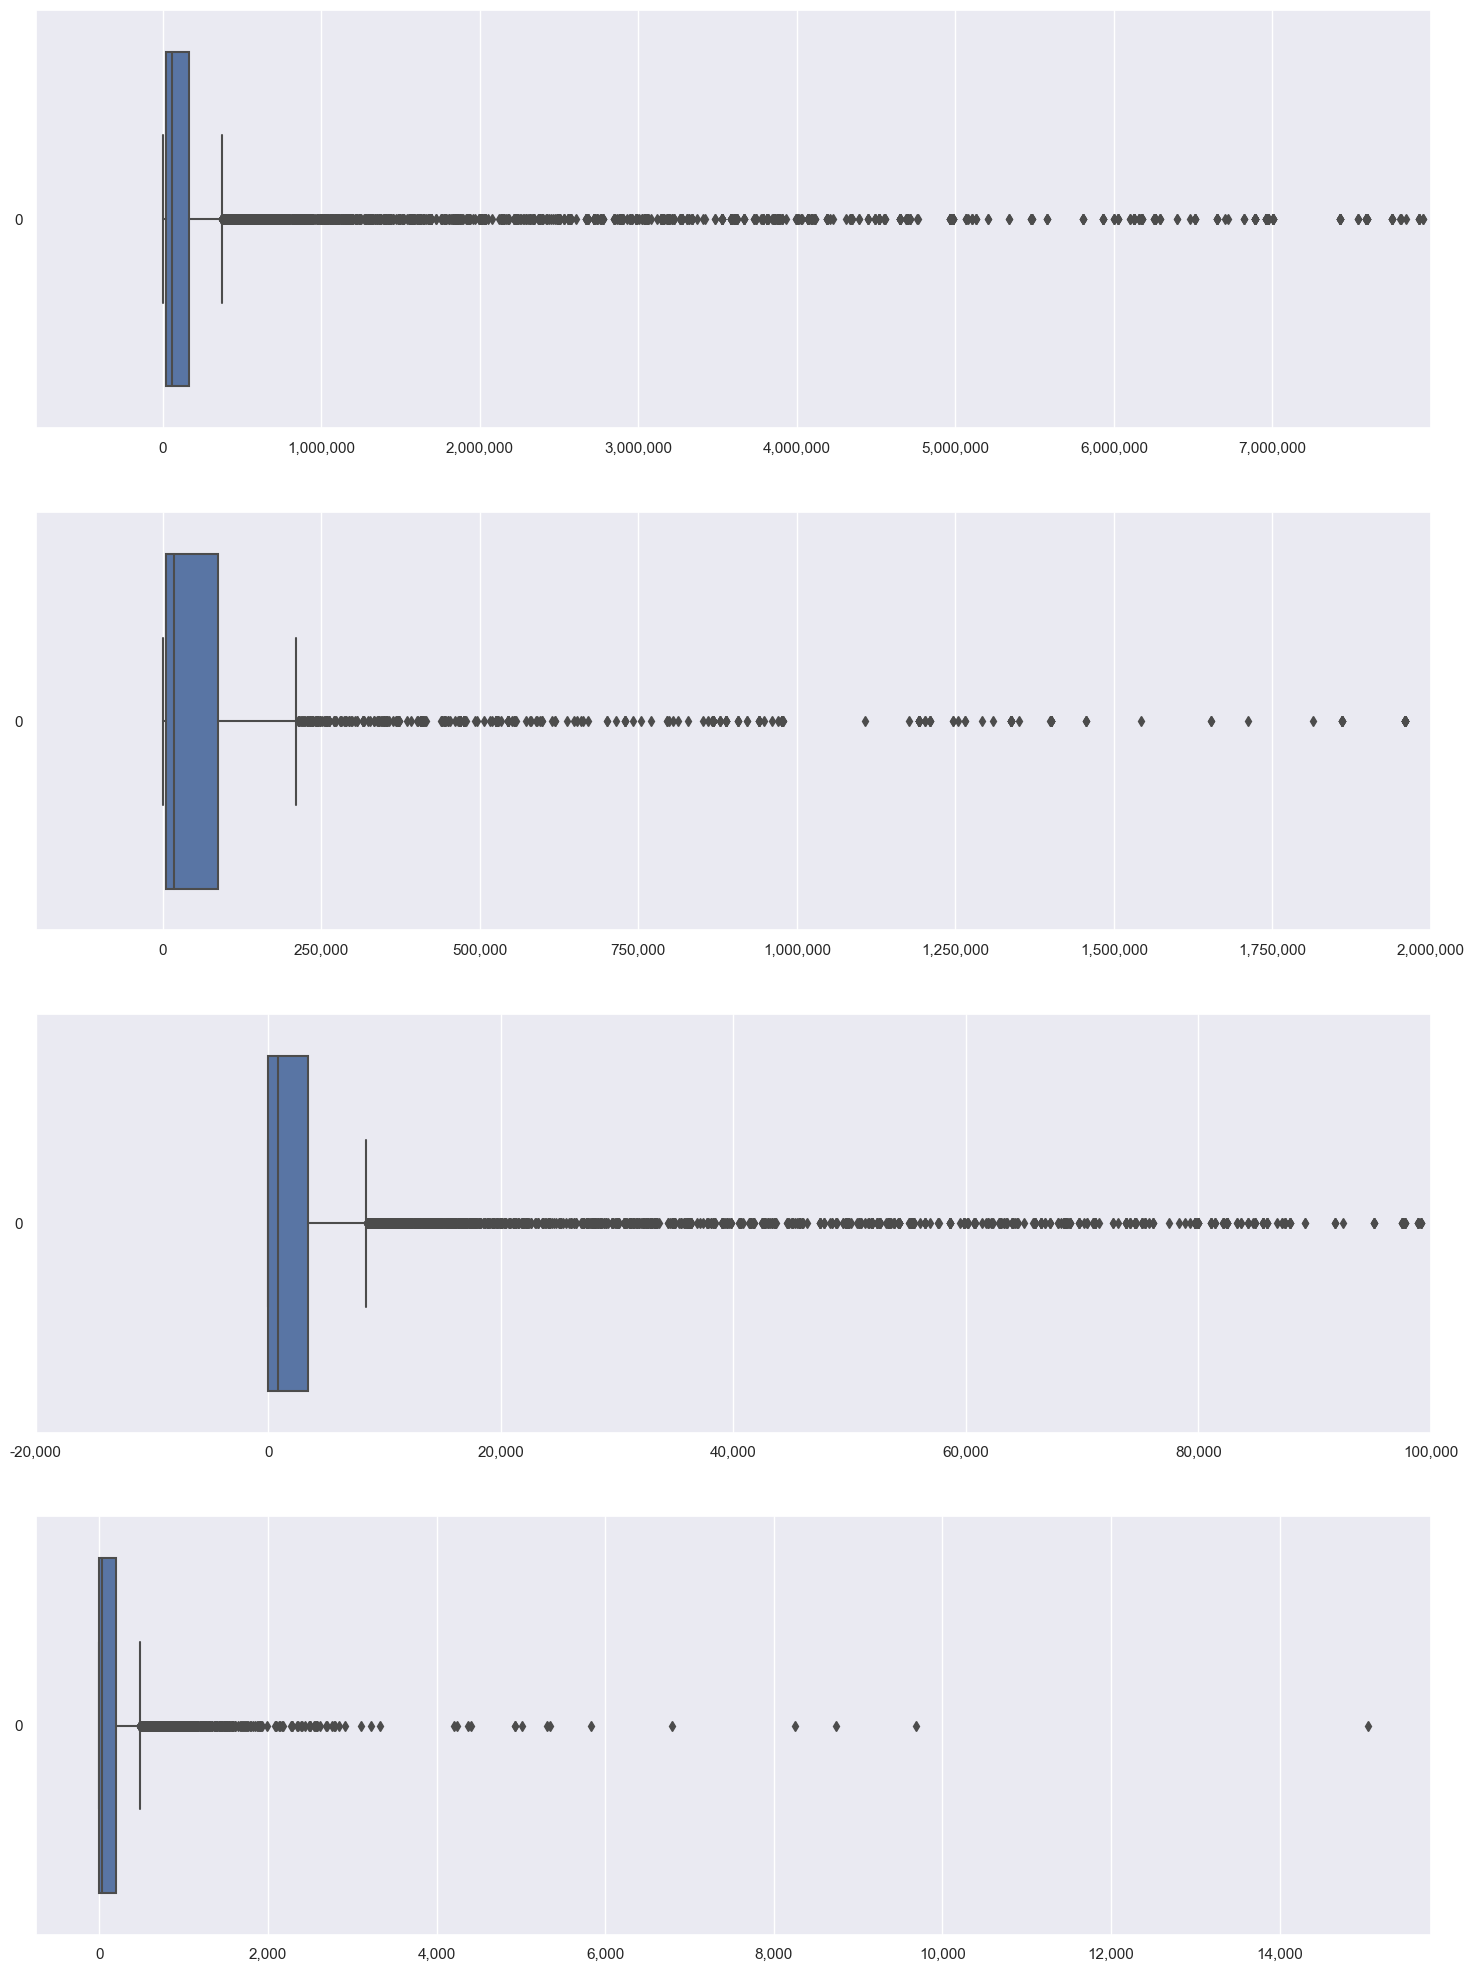

In [38]:
fig, axs = plt.subplots(nrows=4, figsize=(18,25))

# Plot boxplots
sns.boxplot(consumption["cons_12m"],orient="horizontal", ax=axs[0])
sns.boxplot(consumption[consumption["has_gas"] == "t"]["cons_gas_12m"],orient="horizontal", ax=axs[1])
sns.boxplot(consumption["cons_last_month"], orient="horizontal", ax=axs[2])
sns.boxplot(consumption["imp_cons"], orient="horizontal", ax=axs[3])



# Remove scientific notation for x-axis
for ax in axs:
    x_labels = ax.get_xticks().tolist()
    ax.set_xticklabels(['{:,.0f}'.format(x) for x in x_labels])
    axs[0].set_xlim(-200000, 2000000)
    axs[1].set_xlim(-200000, 2000000)
    axs[2].set_xlim(-20000, 100000)

# Display the plot
plt.show()

    - Here we can identify the outliers.

### Analysing Forcast

In [39]:
forecast = client_data[["id", "forecast_cons_12m", "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
    "forecast_price_energy_off_peak","forecast_price_energy_peak", "forecast_price_pow_off_peak","churn"]]

forecast.head()

,id,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1
1,d29c2c54acc38ff3c0614d0a653813dd,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0
2,764c75f661154dac3a6c254cd082ea7d,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0
3,bba03439a292a1e166f80264c16191cb,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0
4,149d57cf92fc41cf94415803a877cb4b,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,0


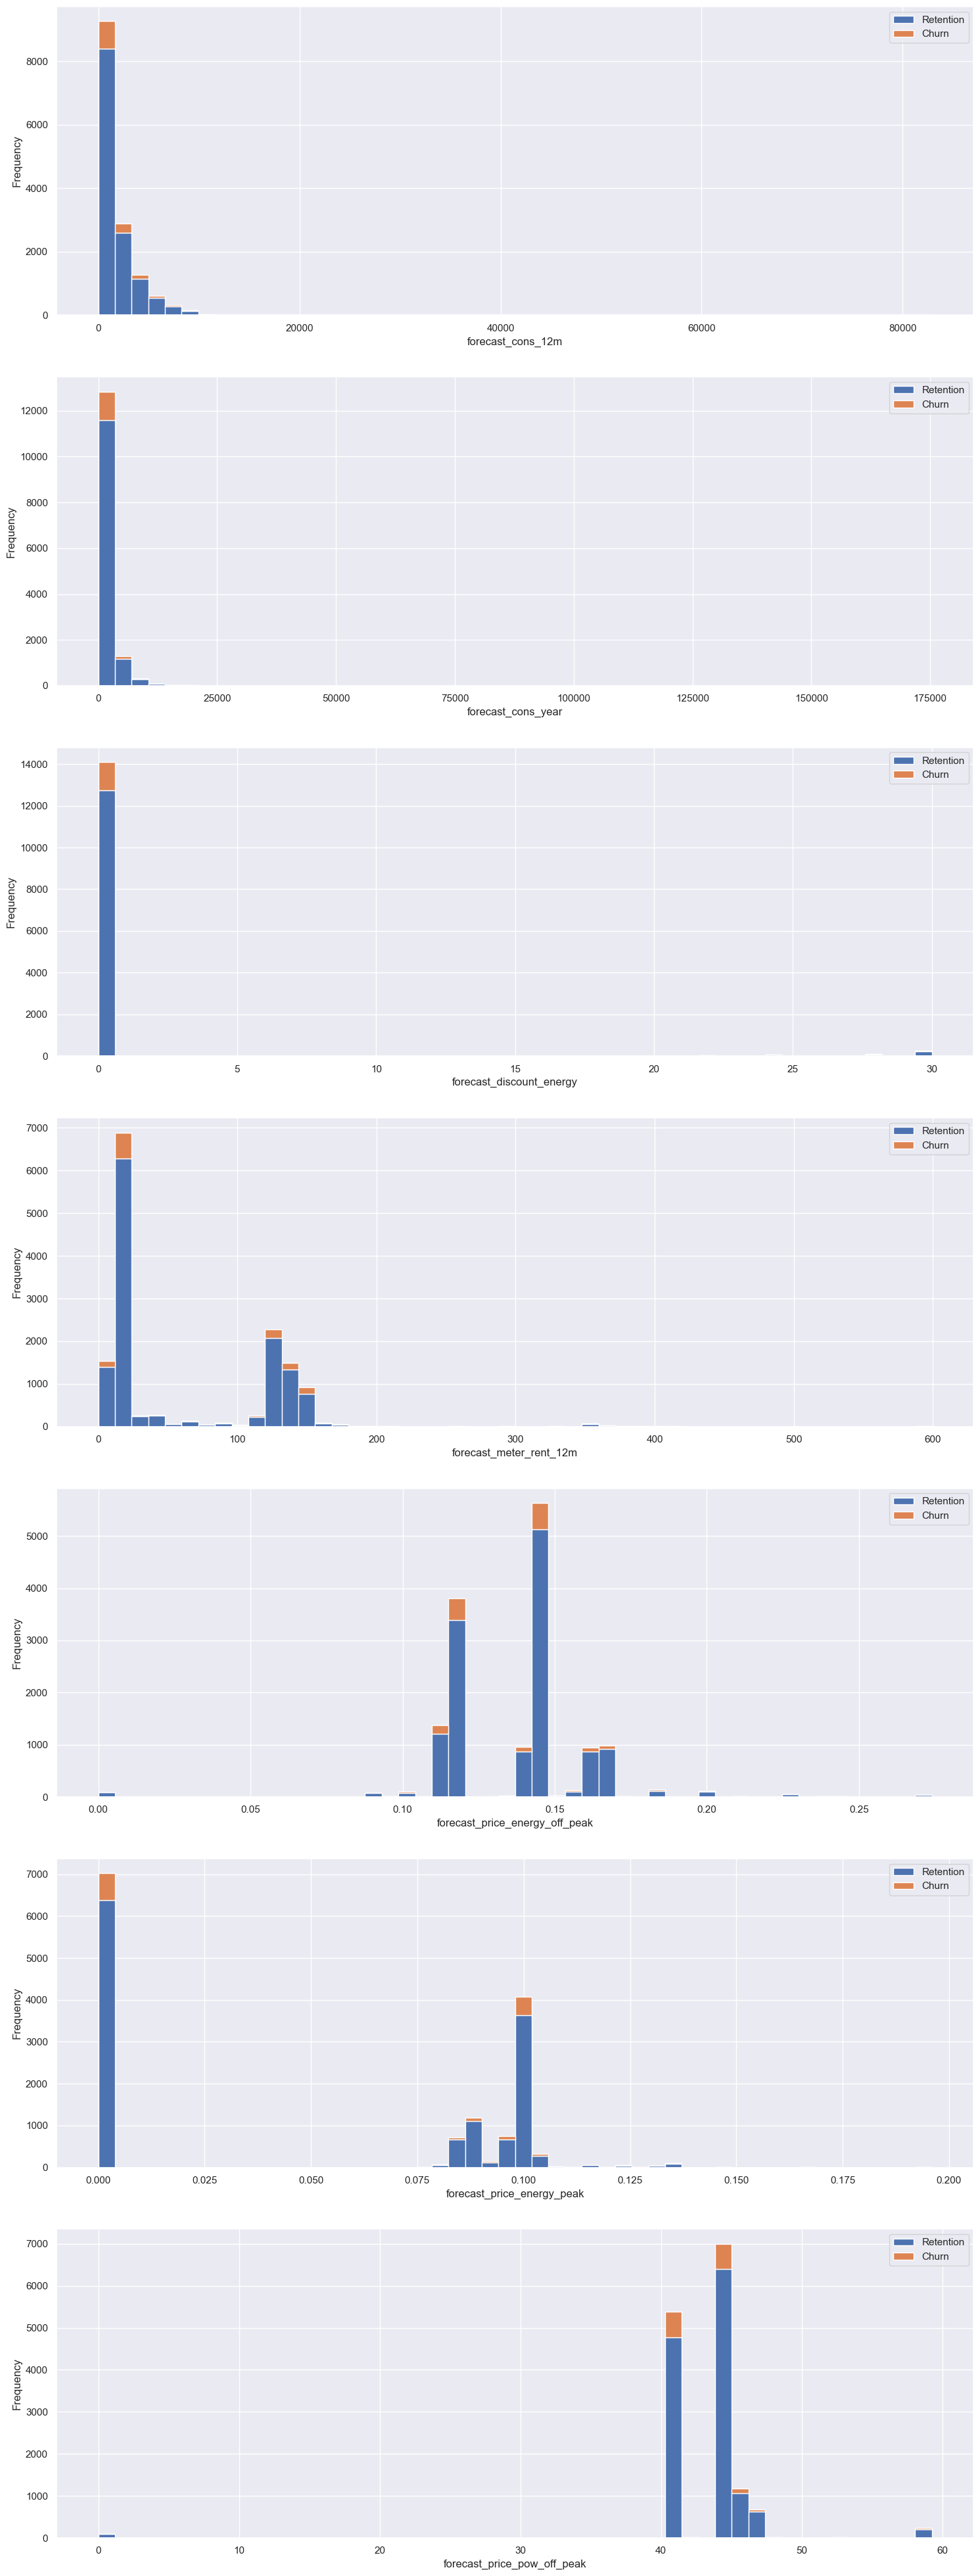

In [40]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))

# Plot histogram
plot_distribution(client_data, "forecast_cons_12m", axs[0])
plot_distribution(client_data, "forecast_cons_year", axs[1])
plot_distribution(client_data, "forecast_discount_energy", axs[2])
plot_distribution(client_data, "forecast_meter_rent_12m", axs[3])
plot_distribution(client_data, "forecast_price_energy_off_peak", axs[4])
plot_distribution(client_data, "forecast_price_energy_peak", axs[5])
plot_distribution(client_data, "forecast_price_pow_off_peak", axs[6])

     - Upon observing the data, it is evident that several variables exhibit a considerable positive skewness. This results in a long tail in the distribution, particularly for higher values, similar to what we observed in the consumption plots. To address this skewness, we will implement specific adjustments in the subsequent procedure.

### Analysing contract type

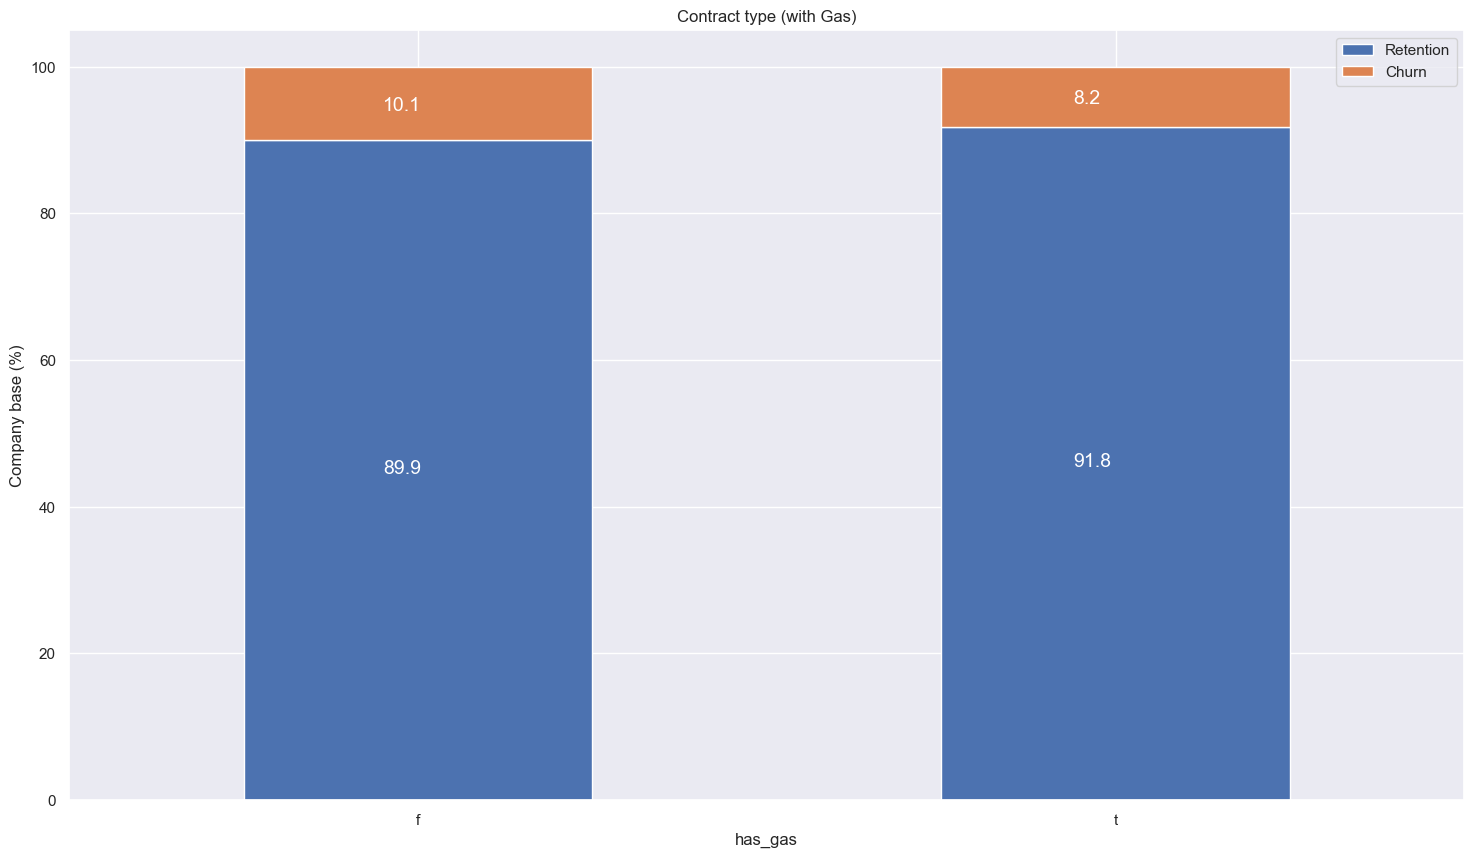

In [43]:
contract_type = client_data[['id', 'has_gas', 'churn']]
contract = contract_type.groupby([contract_type['churn'], contract_type['has_gas']])['id'].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)
plot_stacked_bars(contract_percentage, 'Contract type (with Gas)')

### Margins

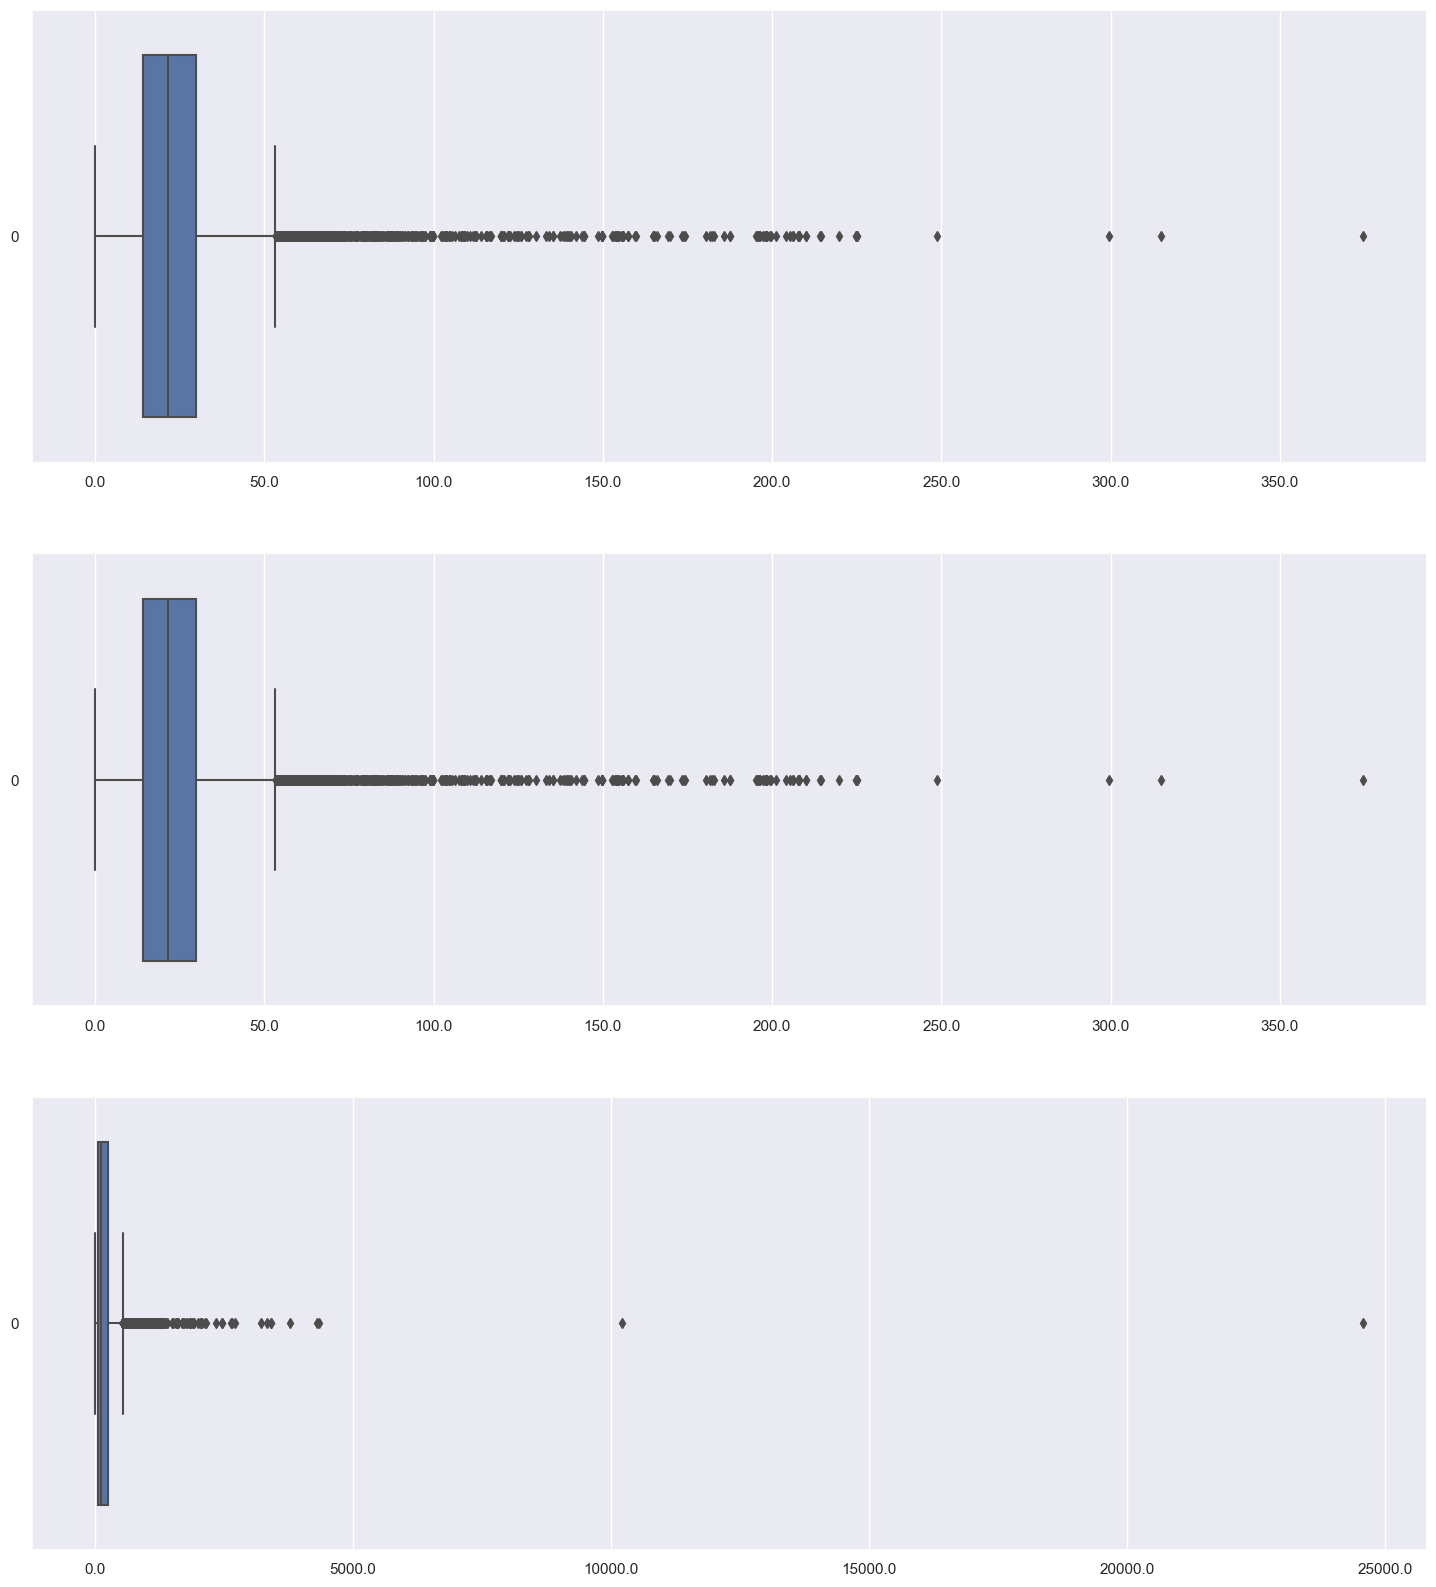

In [48]:
margin = client_data[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']]
fig, axs = plt.subplots(nrows=3, figsize=(18, 20))

# Plot boxplots
sns.boxplot(margin["margin_gross_pow_ele"], orient = 'horizontal', ax=axs[0])
sns.boxplot(margin["margin_net_pow_ele"],orient = 'horizontal', ax=axs[1])
sns.boxplot(margin["net_margin"],orient = 'horizontal', ax=axs[2])

# Remove scientific notation from x-axis labels
axs[0].set_xticklabels(axs[0].get_xticks(), style='normal')
axs[1].set_xticklabels(axs[1].get_xticks(), style='normal')
axs[2].set_xticklabels(axs[2].get_xticks(), style='normal')

# Show the plot
plt.show()

     - Observing that the outliers lies this data as well

### Subscribed power

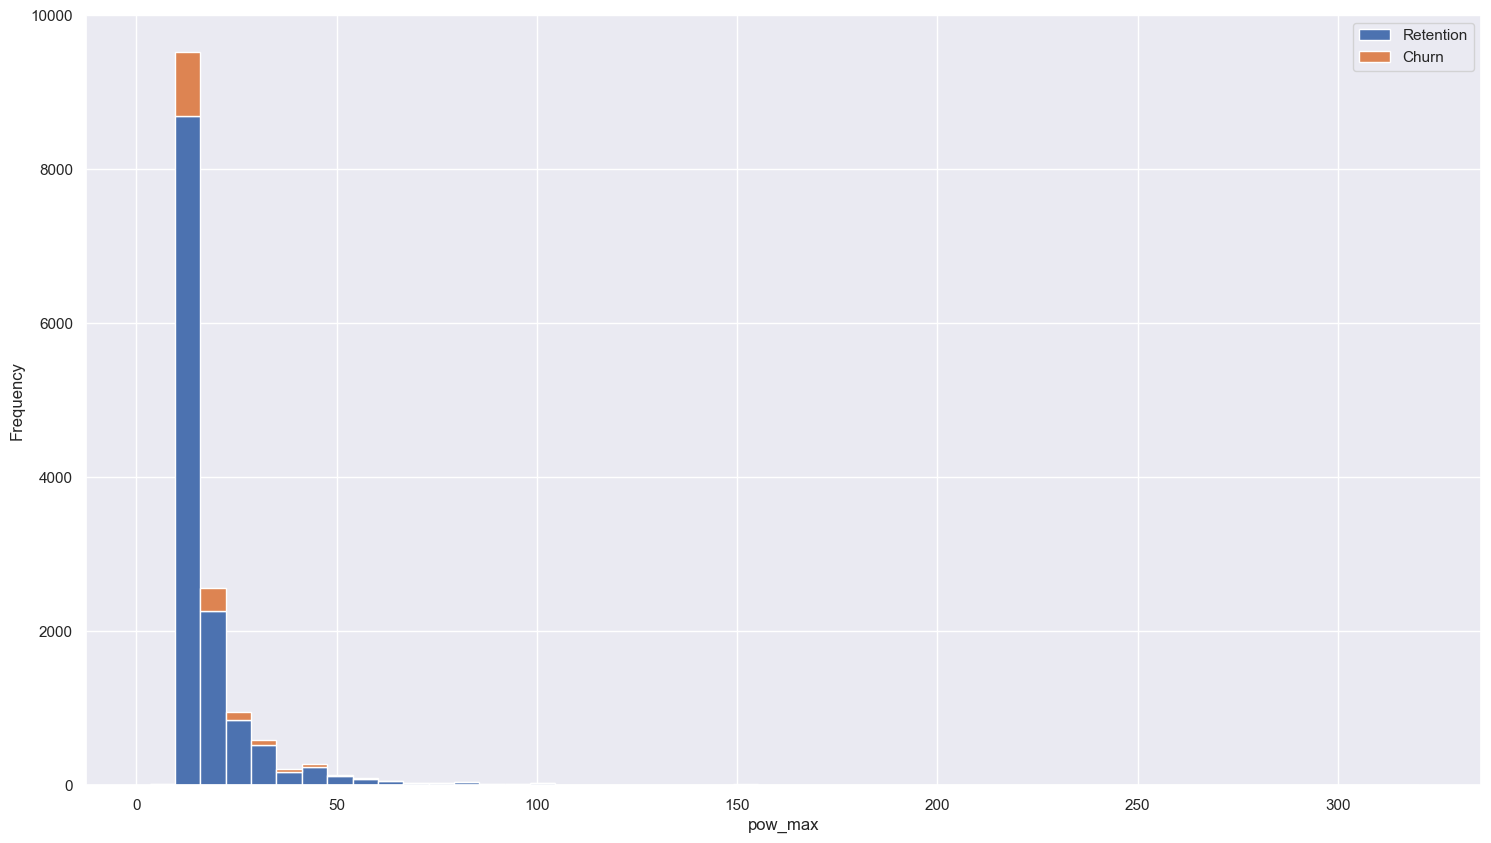

In [49]:
power = client_data[['id', 'pow_max', 'churn']]
fig, axs = plt.subplots(nrows=1, figsize=(18, 10))
plot_distribution(power, 'pow_max', axs)

plt.savefig("View of Subscribed power.png", bbox_inches="tight")

### Others columns 

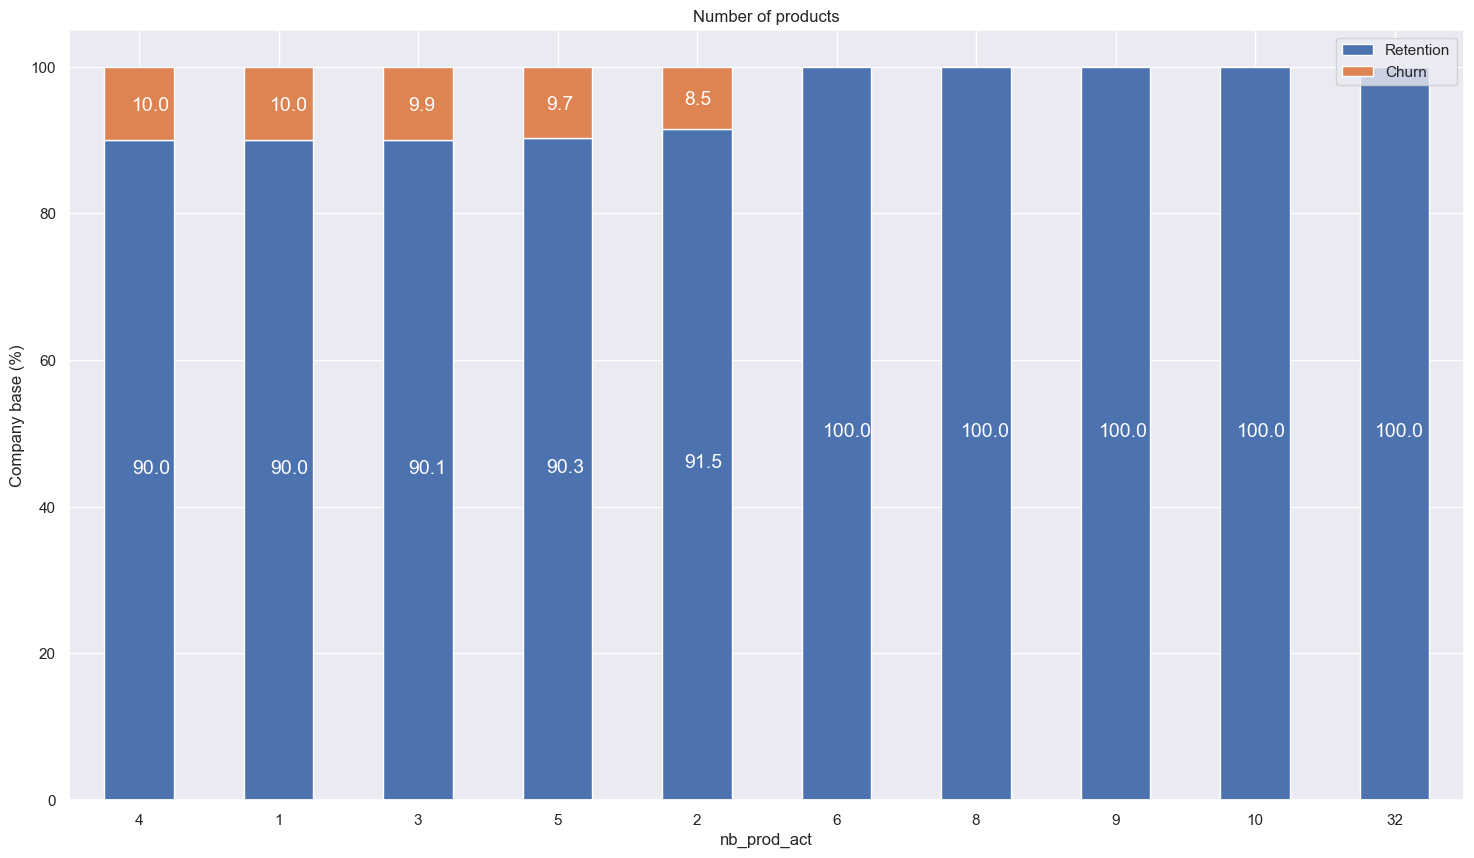

In [50]:
other_cols = client_data[['id', 'nb_prod_act', 'num_years_antig', 'origin_up', 'churn']]
products = other_cols.groupby([other_cols["nb_prod_act"], other_cols["churn"]])["id"].count().unstack(level=1)
products_percentage = (products.div(products.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

plot_stacked_bars(products_percentage, "Number of products")

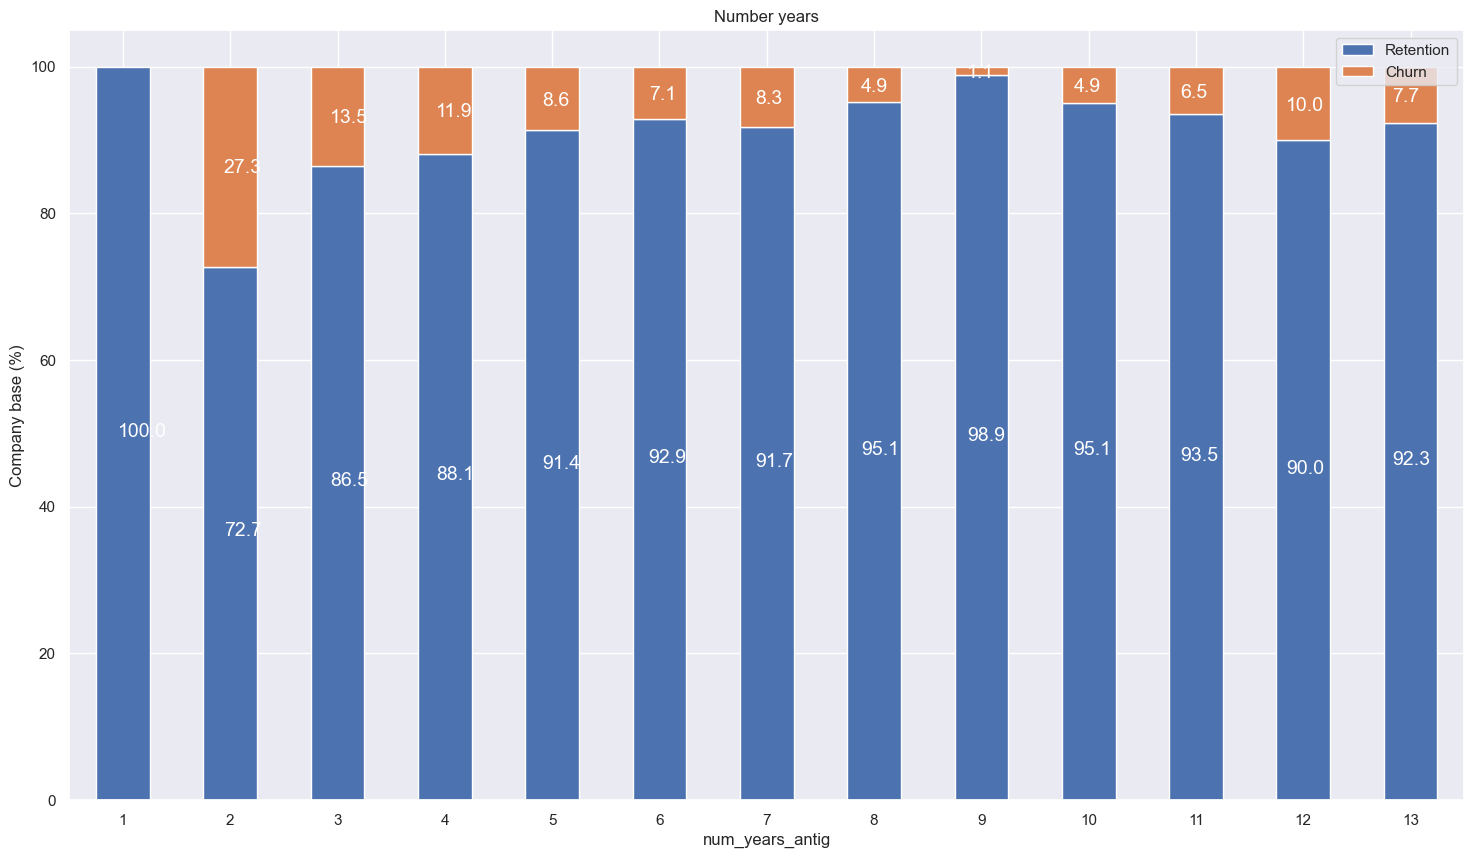

In [51]:
years_antig = other_cols.groupby([other_cols["num_years_antig"], other_cols["churn"]])["id"].count().unstack(level=1)
years_antig_percentage = (years_antig.div(years_antig.sum(axis=1), axis=0)*100)
plot_stacked_bars(years_antig_percentage, "Number years")

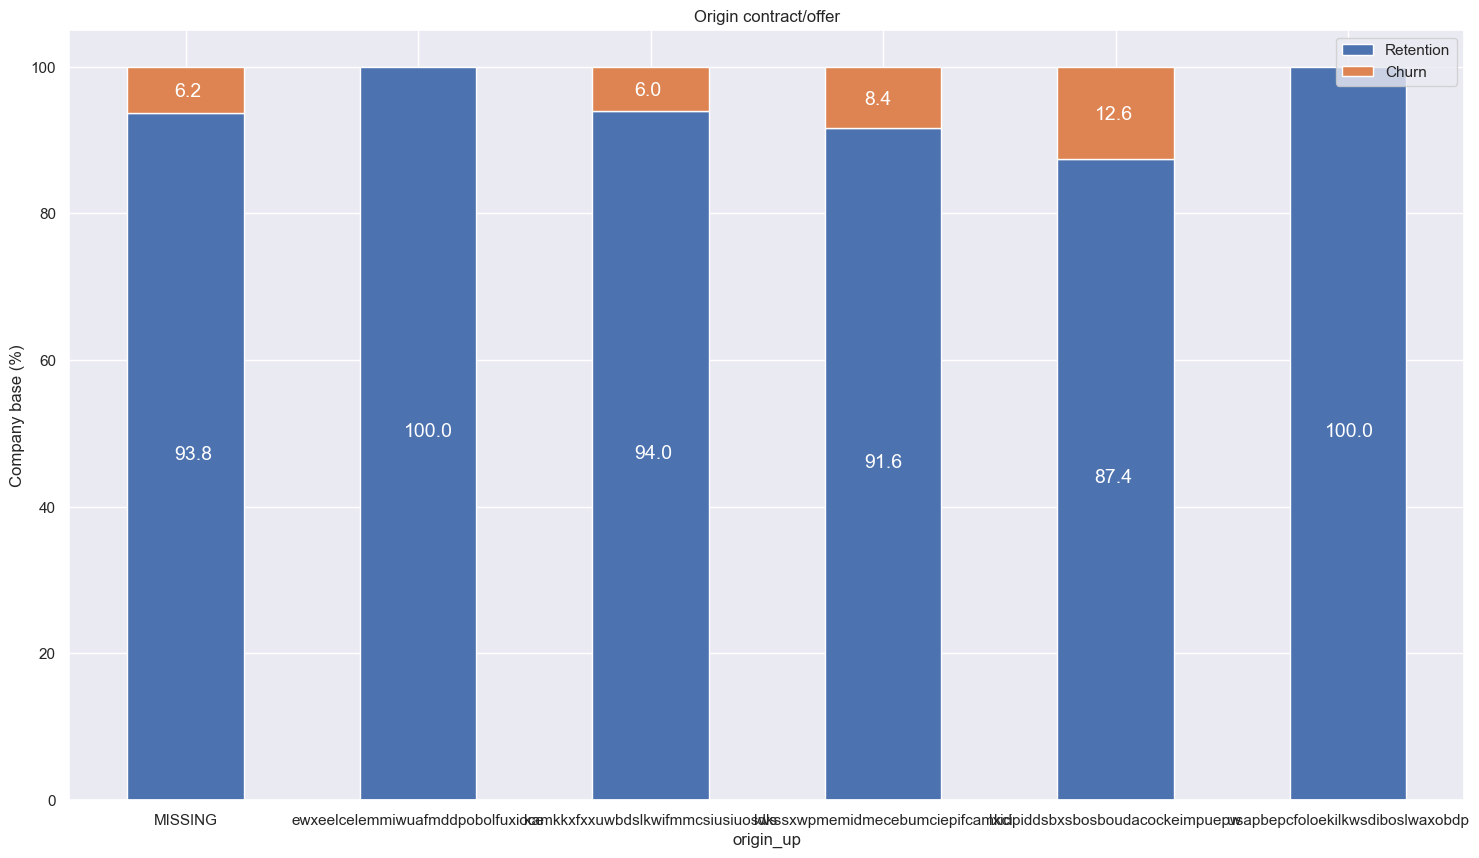

In [52]:
origin = other_cols.groupby([other_cols["origin_up"], other_cols["churn"]])["id"].count().unstack(level=1)
origin_percentage = (origin.div(origin.sum(axis=1), axis=0)*100)
plot_stacked_bars(origin_percentage, "Origin contract/offer")

# 6: Investigation of Hypotheses

  - Now that we have examined the data, it is time to explore whether price responsiveness has any impact on churn. First, let's define what exactly price responsiveness means.

  - Since we have the consumption data for each company for the entire year of 2015, we will create new features to measure "price sensitivity" using the average consumption for the year, the average consumption for the last six months, and the average consumption for the last three months.

In [53]:
# Transform date columns to datetime type
client_data["date_activ"] = pd.to_datetime(client_data["date_activ"], format='%Y-%m-%d')
client_data["date_end"] = pd.to_datetime(client_data["date_end"], format='%Y-%m-%d')
client_data["date_modif_prod"] = pd.to_datetime(client_data["date_modif_prod"], format='%Y-%m-%d')
client_data["date_renewal"] = pd.to_datetime(client_data["date_renewal"], format='%Y-%m-%d')

price_data['price_date'] = pd.to_datetime(price_data['price_date'], format='%Y-%m-%d')

# Create mean average data
mean_year = price_data.groupby(['id']).mean().reset_index()
mean_6m = price_data[price_data['price_date'] > '2015-06-01'].groupby(['id']).mean().reset_index()
mean_3m = price_data[price_data['price_date'] > '2015-10-01'].groupby(['id']).mean().reset_index()

# Comnbine into single dataframe
mean_year = mean_year.rename(index=str, columns={"price_off_peak_var": "mean_year_price_off_peak_var", 
                                                 "price_peak_var": "mean_year_price_peak_var", 
                                                 "price_mid_peak_var": "mean_year_price_mid_peak_var", 
                                                 "price_off_peak_fix": "mean_year_price_off_peak_fix", 
                                                 "price_peak_fix": "mean_year_price_peak_fix", 
                                                 "price_mid_peak_fix": "mean_year_price_mid_peak_fix"})

mean_year["mean_year_price_off_peak"] = mean_year["mean_year_price_off_peak_var"] + mean_year["mean_year_price_off_peak_fix"]
mean_year["mean_year_price_peak"] = mean_year["mean_year_price_peak_var"] + mean_year["mean_year_price_peak_fix"]
mean_year["mean_year_price_mid_peak"] = mean_year["mean_year_price_mid_peak_var"] + mean_year["mean_year_price_mid_peak_fix"]

mean_6m = mean_6m.rename(index=str, columns={"price_off_peak_var": "mean_6m_price_off_peak_var", 
                                             "price_peak_var": "mean_6m_price_peak_var", 
                                             "price_mid_peak_var": "mean_6m_price_mid_peak_var", 
                                             "price_off_peak_fix": "mean_6m_price_off_peak_fix", 
                                             "price_peak_fix": "mean_6m_price_peak_fix", 
                                             "price_mid_peak_fix": "mean_6m_price_mid_peak_fix"})

mean_6m["mean_6m_price_off_peak"] = mean_6m["mean_6m_price_off_peak_var"] + mean_6m["mean_6m_price_off_peak_fix"]
mean_6m["mean_6m_price_peak"] = mean_6m["mean_6m_price_peak_var"] + mean_6m["mean_6m_price_peak_fix"]
mean_6m["mean_6m_price_mid_peak"] = mean_6m["mean_6m_price_mid_peak_var"] + mean_6m["mean_6m_price_mid_peak_fix"]

mean_3m = mean_3m.rename(index=str, columns={"price_off_peak_var": "mean_3m_price_off_peak_var", 
                                             "price_peak_var": "mean_3m_price_peak_var", 
                                             "price_mid_peak_var": "mean_3m_price_mid_peak_var", 
                                             "price_off_peak_fix": "mean_3m_price_off_peak_fix", 
                                             "price_peak_fix": "mean_3m_price_peak_fix", 
                                             "price_mid_peak_fix": "mean_3m_price_mid_peak_fix"})

mean_3m["mean_3m_price_off_peak"] = mean_3m["mean_3m_price_off_peak_var"] + mean_3m["mean_3m_price_off_peak_fix"]
mean_3m["mean_3m_price_peak"] = mean_3m["mean_3m_price_peak_var"] + mean_3m["mean_3m_price_peak_fix"]
mean_3m["mean_3m_price_mid_peak"] = mean_3m["mean_3m_price_mid_peak_var"] + mean_3m["mean_3m_price_mid_peak_fix"]

# Merge into 1 dataframe
price_features = pd.merge(mean_year, mean_6m, on='id')
price_features = pd.merge(price_features, mean_3m, on='id')

In [54]:
price_features.head()

,id,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_mid_peak,...,mean_6m_price_mid_peak,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,...,16.365283,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,...,0.000000,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,...,0.000000,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,16.328003,...,16.360973,0.113068,0.095385,0.069409,40.728885,24.43733,16.291555,40.841953,24.532715,16.360964
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,...,0.000000,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000


- Checking if the `price sensitivity` has any correlation with `churn`

In [55]:
price_analysis = pd.merge(price_features, client_data[['id', 'churn']], on='id')
price_analysis.head()

,id,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_mid_peak,...,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak,churn
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,...,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274,0
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,...,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,...,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000,0
3,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,...,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000,0
4,0013f326a839a2f6ad87a1859952d227,0.126076,0.105542,0.074921,40.728885,24.437330,16.291555,40.854961,24.542872,16.366476,...,0.121647,0.103413,0.075460,40.728885,24.43733,16.291555,40.850532,24.540743,16.367015,0


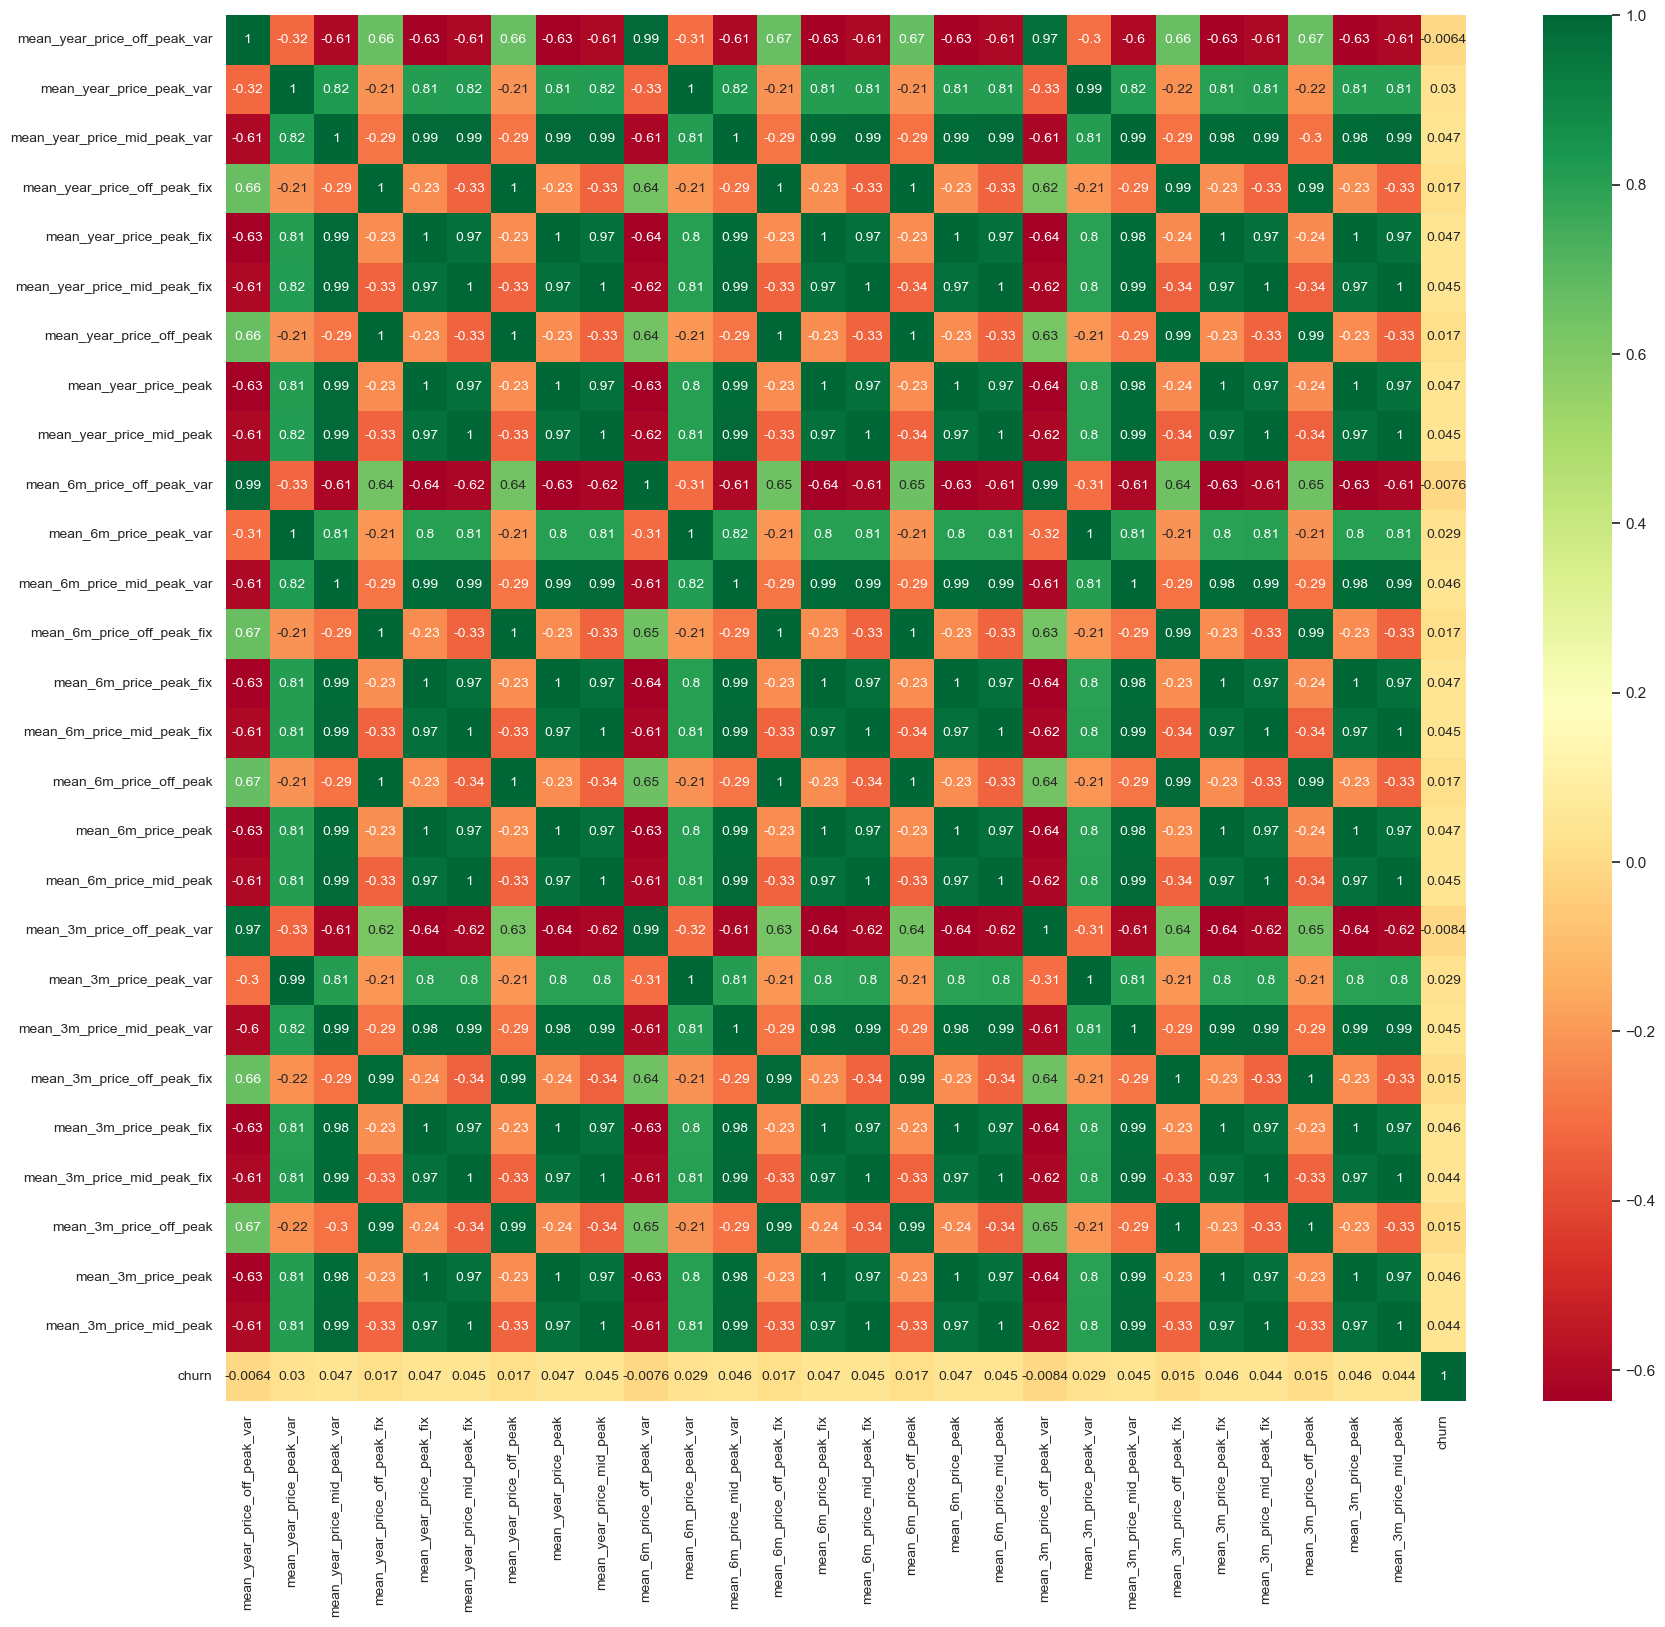

In [56]:
corr = price_analysis.corr()
# Plot correlation
plt.figure(figsize=(20,18))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values,
            annot = True, cmap='RdYlGn', annot_kws={'size':10})

# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

 - Although the association with churn is generally quite modest, the correlation plot reveals a higher degree of correlation with other price sensitivity variables. This suggests that price sensitivity and churn have a shaky linear relationship. This shows that we might need to develop the feature differently if we want price sensivity to be a significant factor in predicting churn.

In [57]:
merged_data = pd.merge(client_data.drop(columns=['churn']), price_analysis, on='id')
merged_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0


In [59]:
merged_data.to_csv("eda_data_clean.csv")